In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [82]:
main_df = pd.read_excel('../stats/ANALIZISRE/all_data.xlsx')
main_df.columns

verb_by_index = {}

with open('../id_by_verb.csv') as f:
    for line in f:
        i_, verb = line.strip().split(',')
        verb_by_index[i_] = verb
        

main_df['verb'] = [verb_by_index[str(i)] for i in main_df['stimulus_id'].values]
main_df['key_resp_rt'] = main_df['key_resp.rt']

In [113]:
main_df.columns

Index(['stimulus_name', 'stimulus_type', 'stimulus_id', 'stimulus_plaus',
       'word_order', 'nom_1_X', 'nom_2_O', 'retried', 'key_resp.keys',
       'answer', 'answer_role', 'key_resp.rt', 'nom1_indented',
       'nom2_indented', 'stimulus.started', 'stimulus.stopped', 'participant',
       'session', 'date', 'list_name', 'random_seed', 'frameRate',
       'Unnamed: 22', 'verb', 'key_resp_rt'],
      dtype='object')

In [3]:

rt_summ = main_df.groupby(['stimulus_name', 'stimulus_id', 'stimulus_type', 'stimulus_plaus']).key_resp_rt.describe()
answ_roles_summ = main_df.groupby(['stimulus_name', 'stimulus_id', 'stimulus_type', 'stimulus_plaus']).answer_role.value_counts()

In [4]:
answ_roles_data = answ_roles_summ.unstack(fill_value=0).reset_index()
answ_roles_data['verb'] = [verb_by_index[str(i)] for i in answ_roles_data.stimulus_id.values]
rt_summ_data = rt_summ.unstack(fill_value=0).reset_index()
rt_summ_data['verb'] = [verb_by_index[str(i)] for i in rt_summ_data.stimulus_id.values]
rt_summ_data['mean_good'] = rt_summ_data[('mean', 'implaus')] + rt_summ_data[('mean', 'plaus')]

In [ ]:
#answ_roles_data.plot.bar(x='verb', y='p', figsize=(16, 8), rot=45)
stimtype = 'sentence'
plaus = 'implaus'
df = answ_roles_data.query(f"stimulus_type == '{stimtype}' and stimulus_plaus == '{plaus}'")
plt.figure(figsize=(9,4), dpi=300)
plt.grid()

plt.bar(df['verb'], df['p'])

plt.xlim((-0.5, 19.5))
plt.xticks(df['verb'], rotation=45, ha='right')

plt.ylim((0, 23))
plt.yticks(range(0,22,3))

plt.title(f'Number of patient-based answers in {plaus}_{stimtype} category')

plt.show()

In [129]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

TypeError: unsupported operand type(s) for *: 'range' and 'int'

Index(['verb', 'key_resp_rtag', 'key_resp_rtpat'], dtype='object')


/home/levai/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


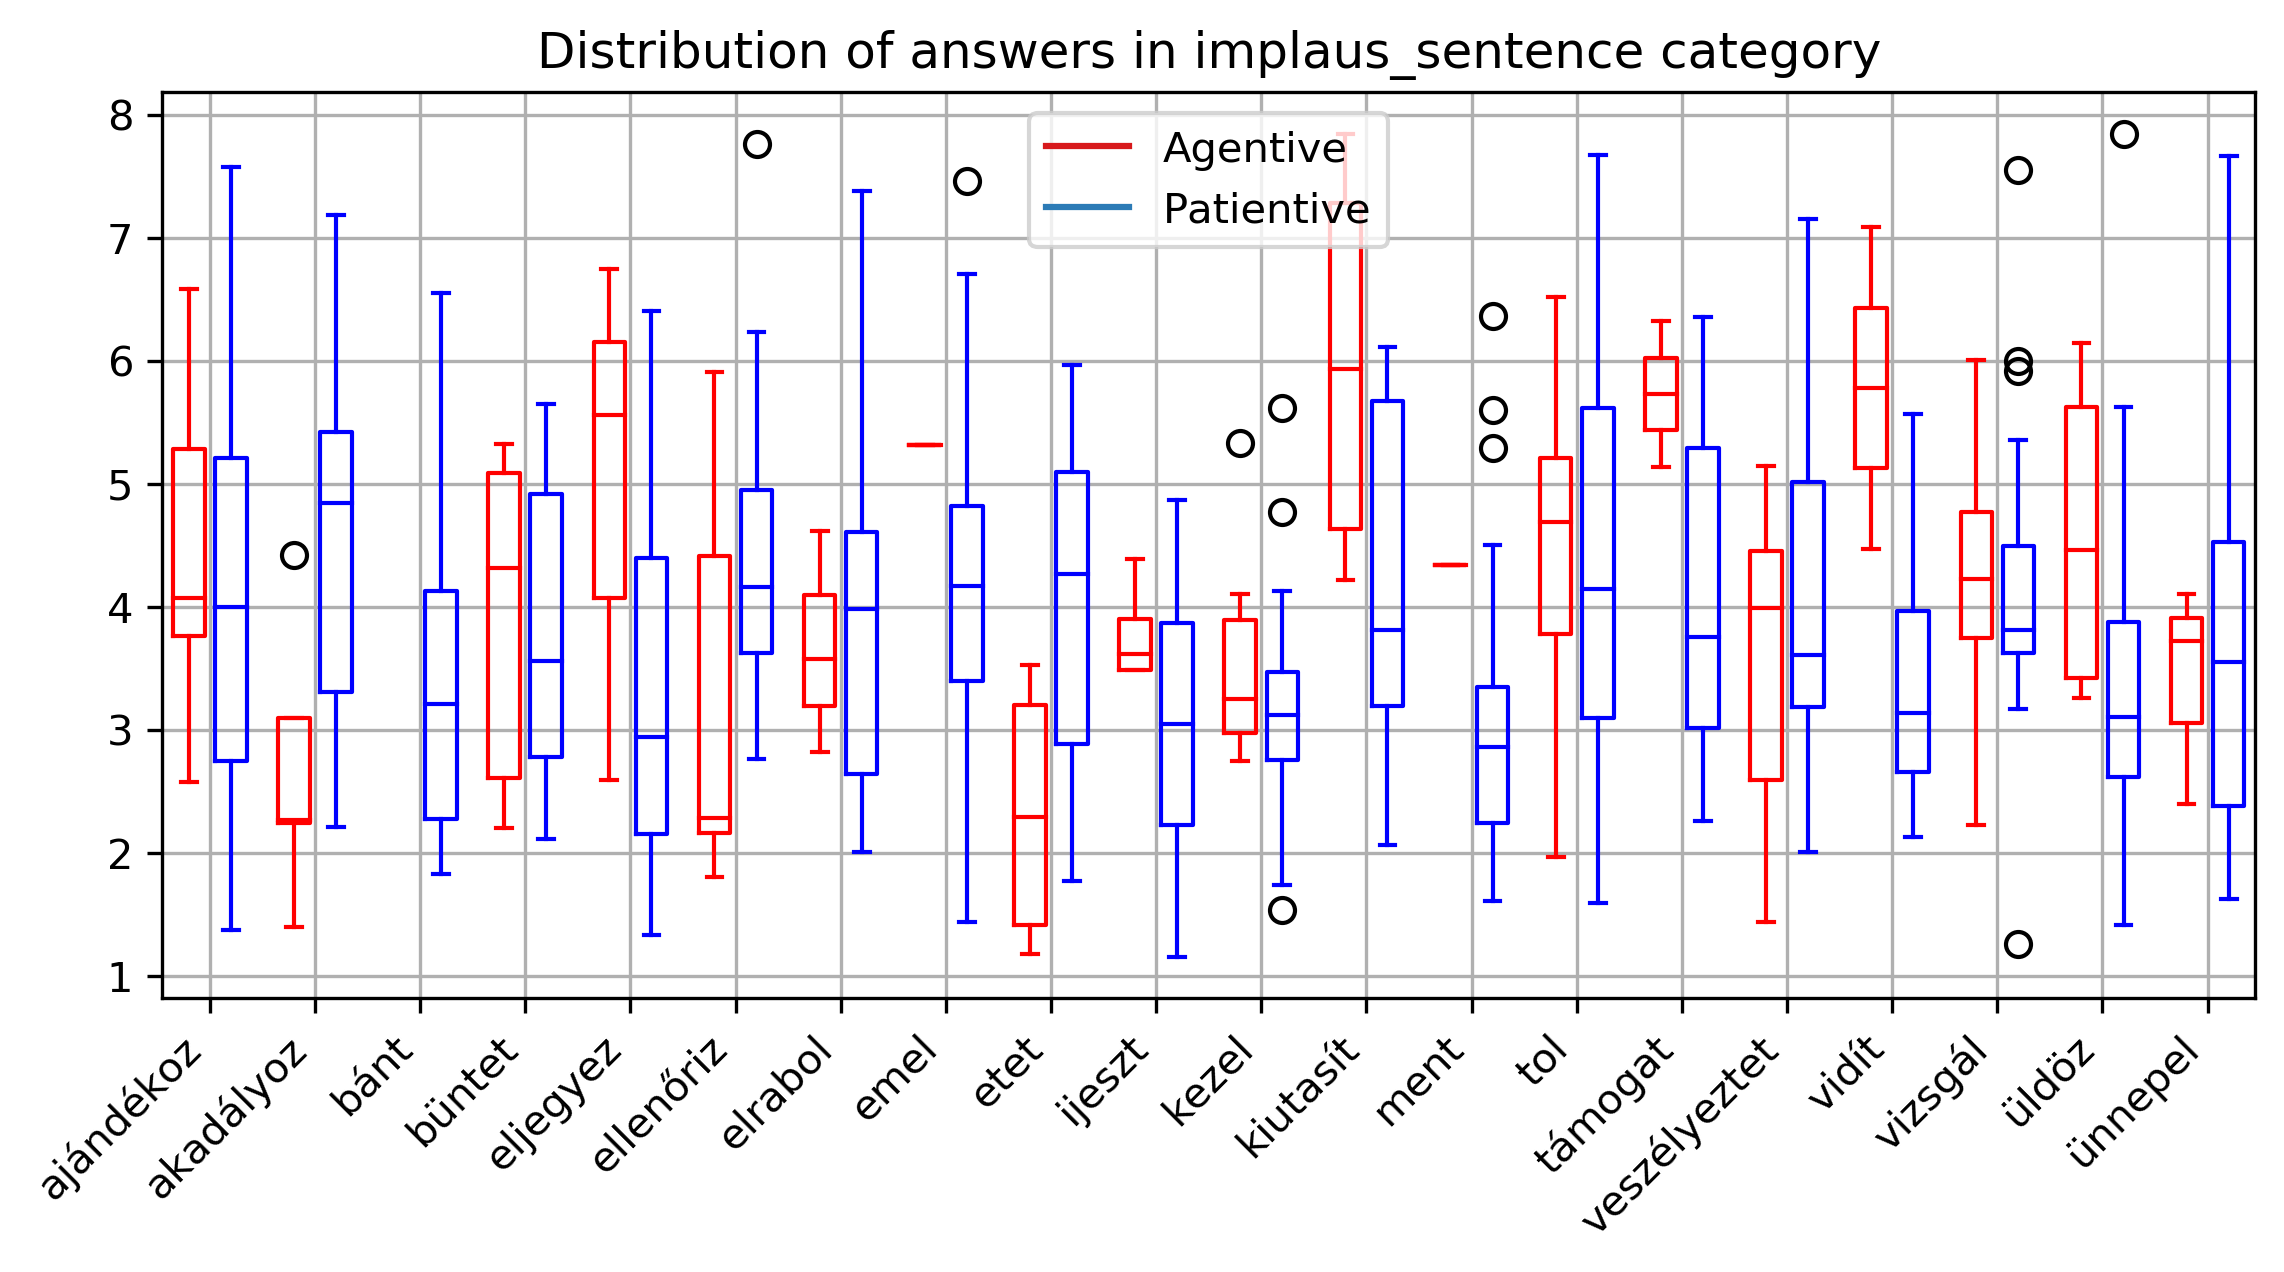

In [144]:
#answ_roles_data.plot.bar(x='verb', y='p', figsize=(16, 8), rot=45)
stimtype = 'sentence'
plaus = 'implaus'


df = main_df.query(f"stimulus_type == '{stimtype}' and stimulus_plaus == '{plaus}'")
data_agentive = df.query("answer_role == 'a'").groupby('verb')['key_resp_rt'].apply(list)
data_patientive = df.query("answer_role == 'p'").groupby('verb')['key_resp_rt'].apply(list)

df = pd.DataFrame(data_agentive).join(data_patientive, how = 'outer', lsuffix = 'ag', rsuffix='pat').reset_index()
print(df.columns)

plt.figure(figsize=(9,4), dpi=300)
plt.grid()

bpl = plt.boxplot(df.key_resp_rtag, positions=np.array(range(len(df.key_resp_rtag)))*2.0-0.4, widths=0.6)
bpr = plt.boxplot(df.key_resp_rtpat, positions=np.array(range(len(df.key_resp_rtpat)))*2.0+0.4, widths=0.6)
set_box_color(bpl, 'red') # colors are from http://colorbrewer2.org/
set_box_color(bpr, 'blue')

plt.plot([], c='#D7191C', label='Agentive')
plt.plot([], c='#2C7BB6', label='Patientive')
plt.legend()

plt.xticks(range(0, len(df.verb) * 2, 2), df.verb, rotation=45, ha='right')

plt.title(f'Distribution of answers in {plaus}_{stimtype} category')

plt.show()

In [ ]:
plt.bar(df['verb'], df['p'])

plt.xlim((-0.5, 19.5))
plt.xticks(df['verb'], rotation=45, ha='right')

plt.ylim((0, 23))
plt.yticks(range(0,22,3))

,verb,key_resp_rtag,key_resp_rtpat
0,ajándékoz,"[2.5747, 5.6188, 3.7315, 4.2761, 6.5801, 3.8624]","[2.8294, 4.1255, 3.1127, 3.8614, 6.8549, 5.320..."
1,akadályoz,"[2.2668, 1.3966, 2.2392, 4.423, 3.0946]","[5.9041, 5.3284, 2.2059, 2.5328, 6.244, 5.1039..."
2,bánt,NaN,"[2.2937, 2.1601, 3.8164, 3.6378, 3.1104, 1.881..."
3,büntet,"[2.2003, 3.6666, 4.9665, 5.3254, 5.1243, 2.2555]","[2.747, 2.786, 2.9747, 4.999, 5.0609, 2.5891, ..."
4,eljegyez,"[5.5594, 2.5878, 6.7439]","[2.9449, 2.8378, 2.2275, 4.384, 1.3332, 1.6175..."
5,ellenőriz,"[2.2812, 4.4111, 3.7399, 2.1621, 5.9079, 2.226...","[4.9505, 4.1612, 4.0552, 3.8771, 4.9445, 6.231..."
6,elrabol,"[3.5747, 4.616, 2.8191]","[2.7796, 2.6062, 4.2211, 4.1895, 2.3061, 2.502..."
7,emel,[5.3156],"[4.26, 5.1086, 3.3927, 4.3734, 4.8209, 6.702, ..."
8,etet,"[3.5304, 3.0908, 1.1771, 1.495]","[2.5285, 4.7233, 2.6195, 5.5554, 5.0651, 3.232..."
9,ijeszt,"[4.3866, 3.7361, 3.488, 3.4902]","[2.4187, 4.2322, 2.2, 2.2941, 3.9913, 2.9977, ..."
